In [1]:
# UPVOTE IF YOU LIKE THE TUTORIAL

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# By the end of this, you will be able to draw basic histograms, KDE and scatter plot and will get to knwo what is univariate and bivariate distributions.
# like us on fb: https://www.facebook.com/codemakerz

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [2]:
print(os.listdir("../input"))
df= pd.read_csv('../input/weight-height.csv')

['weight-height.csv']


# Load Data

In [3]:
# Lets see what we got in df. head prints by default 5 rows.
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


###### So finally we have our data in our hand. Now lets do some visualization to understand it even more finely. As we know there are only two columns in our dataset so we will se historgram & kde plot(univariate distribution) and scatter plot(bivariate distribution), What is univariate & bivariate distribution? As name suggest univariate in plotting only a single feature e.g. histogram and kde plot (kernel distribution estimation). Bivariate means plotting 2 two variables e.g. scatter plot

In [4]:
df.isnull().sum() # As we can see, there is no null values so we dont have to take care of missing values, which is abig relief.

Gender    0
Height    0
Weight    0
dtype: int64

##### lets start few visualisation.
##### We are plotting histogram for height. We can see there are few params. Lets understand them.
<ul>
    <li>
kind: this mean what kind of plot you want e,g, hist, box and other kind. So in our case its hist for histogram. </li>
<li>title: The title of the plot. You can consider it as a name for your plot \n</li>
<li>color: you can choose any color. In my case 'c' stands for cyan</li>
    </ul>

# Visualization

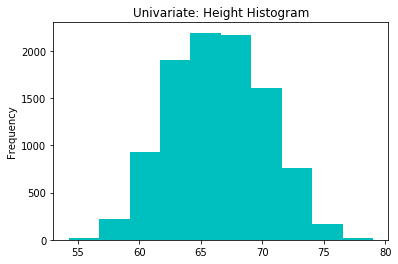

In [5]:
# Lets draw a basic histogram. 
df.Height.plot(kind="hist", title='Univariate: Height Histogram', color='c');

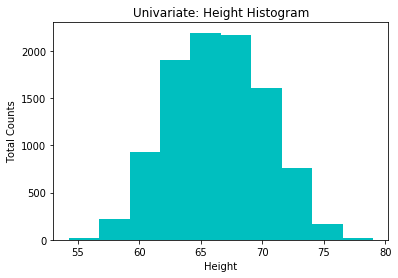

In [6]:
# univariate distribution
#Above histogram same we can do with matplotlib also. Matplotlib allows you to write more flexible code
# title again means you plot name.
# xlabel means label on x-axis and ylabel for y-axis
# bins will be explained in the next plot
plt.hist(x=df.Height, color='c')
plt.title("Univariate: Height Histogram")
plt.xlabel("Height")
plt.ylabel("Total Counts")
plt.plot();

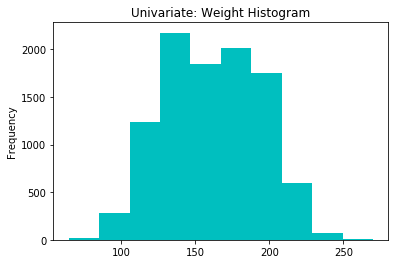

In [7]:
# Lets draw a basic histogram. 
df.Weight.plot(kind="hist", title='Univariate: Weight Histogram', color='c');

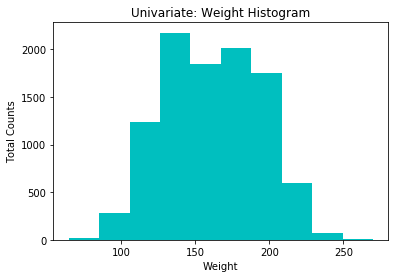

In [8]:
# Weight histogram using matplotlib 
plt.hist(x=df.Weight, color='c')
plt.title("Univariate: Weight Histogram")
plt.xlabel("Weight")
plt.ylabel("Total Counts")
plt.plot();

In [9]:
# So with the above histograms you can estimate the number of people having a particular value of height and weight.
# e.g. number of people having height of 100 cms is around 250.
# Lets say you want increas the bars(thos cyan colored bars). We can increase them by using bins property.


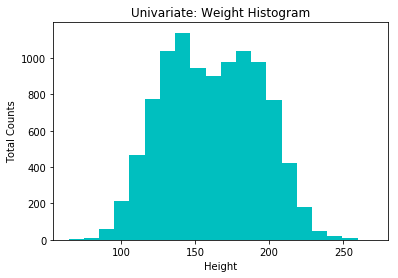

In [10]:
plt.hist(x=df.Weight, color='c', bins=20)
plt.title("Univariate: Weight Histogram")
plt.xlabel("Height")
plt.ylabel("Total Counts")
plt.plot();

In [11]:
# So we are done with the histogram try to find out more about histogram.
#lets plot a kde. KDE is more like smoother curve. It is very simple just change the kind to kde

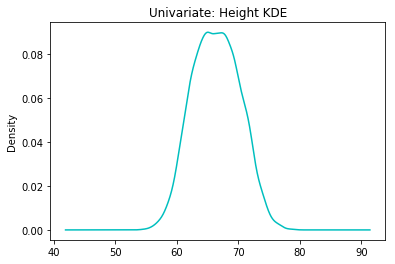

In [12]:
# KDE distribution for Height
df.Height.plot(kind="kde", title='Univariate: Height KDE', color='c');

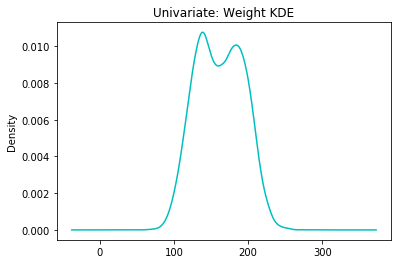

In [13]:
# KDE distribution for Weight
df.Weight.plot(kind="kde", title='Univariate: Weight KDE', color='c');

In [14]:
# So you can imagine KDE as the outline of histogram.
# KDE is more smoother and it gives you a bell shape curve.

In [15]:
# Bivariate: Lets plot bivariate using scatter plot


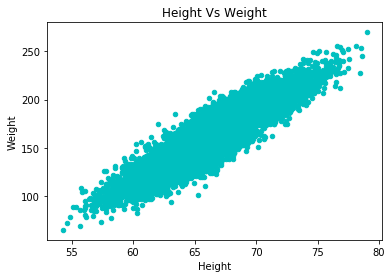

In [16]:
# So here we are plotting a  bivariate plot type called scatter plot between height and weight.
# x = data to show in x-axis(numeric)
# y = data to show in y-axis(numeric)
# color: color of the dots
# title: name for your plot
df.plot.scatter(x="Height", y="Weight", color='c', title='Height Vs Weight');

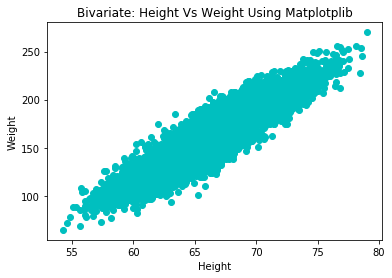

In [17]:
# lets do same with matplotlib
plt.scatter(x=df["Height"], y=df["Weight"], color='c')
plt.title("Bivariate: Height Vs Weight Using Matplotplib")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(); # this means now plot the visualisation with all the settings.

In [18]:
# So I think it would be helpfull for you. If you like it, please follow us on facebook: https://www.facebook.com/codemakerz

# Regression - Predict Weight Using Height

## Split Train, Test Data

In [19]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2:3].values

In [21]:
# First lets split our data
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [23]:
# Lets create a k-fold structure to train our model in better way.

## Linear Regressor Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor = LinearRegression()

In [26]:
model_fit = regressor.fit(X_train, y_train)

In [27]:
y_predict = regressor.predict(X_test)

In [28]:
y_predict

array([[163.3254169 ],
       [172.4561169 ],
       [141.93545547],
       ...,
       [183.17868191],
       [151.35818679],
       [140.9103195 ]])

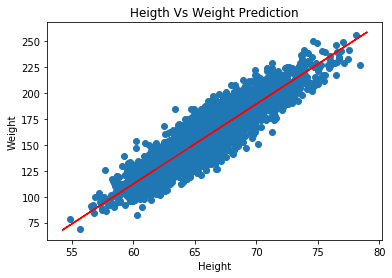

In [29]:
plt.scatter(X_test, y_test)
plt.plot( X_train, regressor.predict(X_train), color='r')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Heigth Vs Weight Prediction")
plt.show()

In [30]:
# So you can see our regression line is finely fitting our data points.
# blue points are actual values & points on red line are predicted values.

# Accuracy

In [31]:
# To find accuracy of model we have many metries like 
# R-square, mean-squared-error(MSE), root-mean-squared-error(RMSE)

In [32]:
from sklearn.metrics import r2_score

In [33]:
print(f"Model Accuracy is: {regressor.score(X_test, y_test)}")

Model Accuracy is: 0.8518184505555159


In [34]:
# Cool we got an accuracy of 85%, which is not bad.

In [35]:
r2_score(y_test, y_predict)

0.8518184505555159

In [36]:
# R-squared Close to 1 is good.

In [37]:
# SO finally you just created your simple linear regression model.

# Classification - Predict Gender By Height & Weight

In [38]:
# Previously we saw how to predict Weigth by Height, which is simple because:
# 1. Both were numeric values
# 2. There was only one independent variable or feature(Height).
# 3. Previously we were finding continues value like Weight but now we are finding discrete values like Male or Female. So
# here we will use classification.
# Now we wil talk about KNN classification. Here we will use two features(Heigth & Weigth) to predict Gender.


> IT IS A MAJORITY WIN CLASSIFIER.

> KNN classification is very simple. It will plot your data point on the graph and select the n number of neighbors(which u define) and related you datapoint to majority.


In [39]:
# Lets Split data

In [40]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [41]:
X_ml = df.iloc[:, 1:3].values
y_ml = df.iloc[:, 0:1].values

In [42]:
X_ml.shape

(10000, 2)

In [43]:
# Can you see any problem here? We can see our target variable is in string form, ML model only understands numeric values.
# To make our model work, we need to encode it to numeric values. We will use LabelEncoder class for it.

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
encoder = LabelEncoder()

In [46]:
y_ml = encoder.fit_transform(y_ml)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
y_ml # so we can see now our string values are encoded. Male as 1 & Female as 0

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
y_ml.shape

(10000,)

In [49]:
# So now we can perform KNN classification. Before that we need to split train test set.

In [50]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.3, random_state=31)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors is the number of neighbours

In [52]:
knn.fit(X_train_ml, y_train_ml)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [53]:
y_predict_ml = knn.predict(X_test_ml)

In [54]:
y_predict_ml # So you can see now our model is classifying the gender

array([0, 1, 0, ..., 1, 0, 0])

In [55]:
# Lets plot confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test_ml, y_predict_ml)

array([[1315,  157],
       [ 138, 1390]])

In [58]:
# So our confusion matrix shows we predicted 1315+1390=2705 values correct and 138+157=295 incorrect. Not bad but can we do it better?

In [59]:
# Lets change the n_neighbors values in KNN classifier and see

In [60]:
knn = KNeighborsClassifier(n_neighbors=5) #n_neighbors is the number of neighbours
knn.fit(X_train_ml, y_train_ml)
y_predict_ml = knn.predict(X_test_ml)
cm = confusion_matrix(y_test_ml, y_predict_ml)
cm

array([[1330,  142],
       [ 135, 1393]])

In [61]:
print("accuracy:", knn.score(X_test_ml, y_test_ml)) # accuracy of 90% which is a very good number. But let see can we increase this

accuracy: 0.9076666666666666


In [62]:
# correct = 2723 & incorrect = 277. So We can see it depend on the number of the knn neighbours. You have to check 
# multiple value to find the best result. In our case i think 5 seems the good values.

# Improve Model

In [63]:
from sklearn.model_selection import GridSearchCV
# below is the params dictionary object. Here we can add the parameters which we can experiment with. so now our model will get evaluated with all the possible 
# combination of below params and let you the best score and param combination.
params = {
    "n_neighbors": [5, 10, 20],
    'leaf_size' : [30, 40, 50],
    'algorithm': ["ball_tree", "kd_tree", "brute"],
    'p': [1, 2]
}
gs = GridSearchCV(estimator=knn, cv=10, param_grid=params )

In [64]:
gsresult = gs.fit(X_train_ml, y_train_ml ) # it may take a while as grid search cv will run your mode with all the possible combinations of given params.

In [65]:
print(gsresult.best_score_) # So you can see we increased accuracy with more than 1% for training data.
print(gsresult.best_params_) # So this is the best possible combination for our model. Lets try with that.

0.919
{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 20, 'p': 1}


In [66]:
knn_best_fit = KNeighborsClassifier(algorithm = "ball_tree", leaf_size= 30, n_neighbors = 20, p=1)
knn_best_fit.fit(X_train_ml, y_train_ml)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=1,
                     weights='uniform')

In [67]:
y_predict_best = knn_best_fit.predict(X_test_ml)

In [68]:
cm_best = confusion_matrix(y_test_ml, y_predict_best)
cm_best

array([[1352,  120],
       [ 133, 1395]])

In [69]:
print("accuracy:", knn.score(X_test_ml, y_predict_best)) # accuracy of our new model is 97% which means 7% more than our old model for unseen data or test data, which is amazing.
# So here we will stop with this configuration.

accuracy: 0.9706666666666667


In [70]:
# As our data is very small but still GridSearchCV performed amazing. But remember if you have big data it can give you even better results so always try to configure your model with it.
# For larger dataset it can take a long time to train model using gridsearchcv.

# Plot Confusion Matrix.

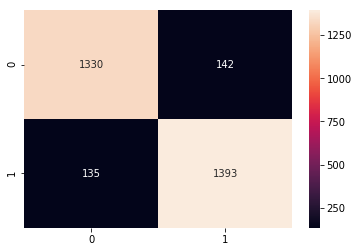

In [71]:
# Though we can see our confusion matrix but it is always good to plot it in a user friendly way.
sns.heatmap(cm, annot=True, fmt='g')

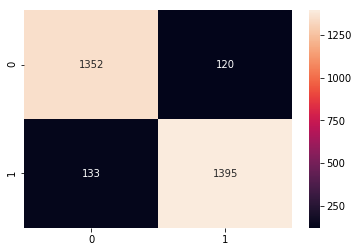

In [72]:
sns.heatmap(cm_best, annot=True, fmt='g')

So from above images we can see the difference between our result.

# Neural Network

Though we already got a good accuracy for our model but lets try neural network.
My main aim here is to explain how neural network works. It is not necessary that neural networks are always better than other models.
We will just see the implementation on Artificial Neural Network and test whether it performs better or worse. Ususally ANN needs huge data but lets apply.

In [73]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [74]:
# input_dim is no of inputs in ANN which is equal to no of columns in X_train 
# Dense() adding a layer
# Dropout() is to avoid overfit. It drops given percentage of neurons in the next layer.
clf = Sequential([
    Dense(input_dim=2, units=20, activation='relu'),
    #Dropout(0.2),
    Dense(units=20, activation='relu'),
    Dense(units=2, activation='sigmoid') # final layer is output unit. Here units should be equal to the number of class in you output.
])
clf.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [75]:
clf.summary() # you can check your model details

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 522
Trainable params: 522
Non-trainable params: 0
_________________________________________________________________


In [76]:
clf.fit(X_train_ml, y_train_ml, batch_size=10, epochs=50)

Epoch 1/50
7000/7000 [==============================] - 6s 914us/step - loss: 7.9946 - acc: 0.5040
Epoch 2/50
7000/7000 [==============================] - 2s 300us/step - loss: 7.9946 - acc: 0.5040
Epoch 3/50
7000/7000 [==============================] - 2s 296us/step - loss: 7.9946 - acc: 0.5040
Epoch 4/50
7000/7000 [==============================] - 2s 297us/step - loss: 7.9946 - acc: 0.5040
Epoch 5/50
7000/7000 [==============================] - 2s 299us/step - loss: 7.9946 - acc: 0.5040
Epoch 6/50
7000/7000 [==============================] - 2s 301us/step - loss: 7.9946 - acc: 0.5040
Epoch 7/50
7000/7000 [==============================] - 2s 299us/step - loss: 7.9946 - acc: 0.5040
Epoch 8/50
7000/7000 [==============================] - 2s 297us/step - loss: 7.9946 - acc: 0.5040
Epoch 9/50
7000/7000 [==============================] - 2s 297us/step - loss: 7.9946 - acc: 0.5040
Epoch 10/50
7000/7000 [==============================] - 2s 297us/step - loss: 7.9946 - acc: 0.5040
Epoch 11/

In [77]:
clf.evaluate(X_train_ml, y_train_ml) # So accuracy of 91% in training data

7000/7000 [==============================] - 0s 44us/step


[7.994575355529785, 0.504]

In [78]:
clf.evaluate(X_test_ml, y_test_ml) # So accuracy of 91% in test data

3000/3000 [==============================] - 0s 42us/step


[8.209483375549317, 0.4906666665871938]

In [79]:
# So we can see neural network did not perform well on data. It may be because we have very less data. But you may try adding more Dense layers.
# our main aim was to show the implementation of neural network.

In [80]:
# You can predict like
y_predict_nn = clf.predict_classes(X_test_ml)

In [81]:
cm_nn = confusion_matrix(y_test_ml, y_predict_nn)
cm_nn

array([[1472,    0],
       [1528,    0]])

In [82]:
# So we have a very bad model. So finally after evaluation KNN and ANN we found that in our case KNN with optimized values is best model for us.
# AGAIN... IT ISNOT NECESSARY THAT NEURAL NETWORK WILL ALWAYS PERFORM GOOD FOR YOUR DATA.

In [83]:
# So now finally you just finished your simple classifier.
# I hope you understood the process.
# Like us on facebook fo more tutorials :  https://www.facebook.com/codemakerz